In [242]:
#import pandas and numpy
import pandas as pd
import numpy as np

In [243]:
#upload data set to colab from desktop
#once uploaded, load data set 

dataset = pd.read_csv("amazon consumer dataset ver2.csv")
dataset.head(5)

,Uniq Id,Product Name,Brand Name,Asin,Category,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,...,Product Url,Stock,Product Details,Dimensions,Color,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,101,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$238,NaN,NaN,...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,102,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$100,NaN,55324,...,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,103,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$35,NaN,NaN,...,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,104,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$29,NaN,142,...,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,105,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17,NaN,62151,...,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [244]:
#wrangle-rows by columns
dataset.shape

(10002, 28)

From this dataset, there are a total of 10002 rows and 28 columns(variables).

In [245]:
#Check variable characteristics
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Uniq Id                10002 non-null  int64  
 1   Product Name           10002 non-null  object 
 2   Brand Name             0 non-null      float64
 3   Asin                   0 non-null      float64
 4   Category               9172 non-null   object 
 5   Upc Ean Code           34 non-null     object 
 6   List Price             0 non-null      float64
 7   Selling Price          9895 non-null   object 
 8   Quantity               0 non-null      float64
 9   Model Number           8232 non-null   object 
 10  About Product          9729 non-null   object 
 11  Product Specification  8370 non-null   object 
 12  Technical Details      9212 non-null   object 
 13  Shipping Weight        8864 non-null   object 
 14  Product Dimensions     479 non-null    object 
 15  Im

In [246]:
# Check for duplicates
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
9997     False
9998     False
9999     False
10000    False
10001    False
Length: 10002, dtype: bool

All 10002 rows are unique. 

In [247]:
#Dropping redundant columns
cols = [2,3,5,6,8,9,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27]
dataset.drop(dataset.columns[cols], axis =1, inplace=True)

Columns 2,3,6,8,17,19-24,26,27 only contains null values (not useful).
Columns 1,5,9,12,14-16,18,25 are not helpful with achieving our objectives. 

In [248]:
# dropping null values to avoid errors 
dataset.dropna(inplace = True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7216 entries, 0 to 10001
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Uniq Id                7216 non-null   int64 
 1   Product Name           7216 non-null   object
 2   Category               7216 non-null   object
 3   Selling Price          7216 non-null   object
 4   About Product          7216 non-null   object
 5   Product Specification  7216 non-null   object
 6   Shipping Weight        7216 non-null   object
dtypes: int64(1), object(6)
memory usage: 451.0+ KB


In [249]:
# new data frame with split value columns. We use n = 3 to get a maximum of 3+1 columns
new = dataset["Category"].str.split("|", n = 3, expand = True)
  
# making the first category called Main Category
dataset["Main Category"]= new[0] 
  
# making the second category called sub_category 
dataset["Sub-Category"]= new[1]

# making the third category called side_category 
dataset["Side Category"]= new[2]

# making the last column consist of the remaining categories
dataset["Other Categories"]= new[3]

# Dropping old category columns and the remaining categories 
dataset.drop(columns =["Category", "Other Categories"], inplace = True)

In [250]:
# Revised dataset to conduct EDA
dataset.head()

,Uniq Id,Product Name,Selling Price,About Product,Product Specification,Shipping Weight,Main Category,Sub-Category,Side Category
0,101,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",$238,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7 pounds,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,102,"Electronic Snap Circuits Mini Kits Classpack, ...",$100,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4 pounds,Toys & Games,Learning & Education,Science Kits & Toys
2,103,3Doodler Create Flexy 3D Printing Filament Ref...,$35,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8 ounces,Toys & Games,Arts & Crafts,Craft Kits
3,104,Guillow Airplane Design Studio with Travel Cas...,$29,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4 ounces,Toys & Games,Hobbies,Models & Model Kits
4,105,Woodstock- Collage 500 pc Puzzle,$17,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4 ounces,Toys & Games,Puzzles,Jigsaw Puzzles


In [251]:
dataset.rename(columns = {'Uniq Id':'Id','Shipping Weight':'Shipping Weight(Pounds)', 'Selling Price':'Selling Price($)'}, inplace = True)
dataset['Selling Price($)'] = dataset['Selling Price($)'].str.strip('$')
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('ounces')
dataset['Shipping Weight(Pounds)'] = dataset['Shipping Weight(Pounds)'].str.strip('pounds')

dataset.head()

,Id,Product Name,Selling Price($),About Product,Product Specification,Shipping Weight(Pounds),Main Category,Sub-Category,Side Category
0,101,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",238,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,102,"Electronic Snap Circuits Mini Kits Classpack, ...",100,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4,Toys & Games,Learning & Education,Science Kits & Toys
2,103,3Doodler Create Flexy 3D Printing Filament Ref...,35,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8,Toys & Games,Arts & Crafts,Craft Kits
3,104,Guillow Airplane Design Studio with Travel Cas...,29,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Toys & Games,Hobbies,Models & Model Kits
4,105,Woodstock- Collage 500 pc Puzzle,17,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4,Toys & Games,Puzzles,Jigsaw Puzzles


In [252]:
# Start of EDA
import seaborn as sns
import matplotlib.pyplot as plt

In [253]:
#data visualisation

#lets look at patterns in terms of Product Category popularity
#generate count for "Main Category"

dataset['Main Category'].value_counts()

Toys & Games                                 5556
Home & Kitchen                                569
Sports & Outdoors                             436
Clothing, Shoes & Jewelry                     258
Arts, Crafts & Sewing                         110
Baby Products                                  82
Office Products                                60
Hobbies                                        18
Industrial & Scientific                        17
Pet Supplies                                   16
Remote & App Controlled Vehicle Parts          14
Health & Household                             14
Tools & Home Improvement                       11
Grocery & Gourmet Food                         11
Beauty & Personal Care                          9
Patio, Lawn & Garden                            9
Automotive                                      9
Electronics                                     6
Remote & App Controlled Vehicles & Parts        6
Video Games                                     2


The top 5 Category: 
1.Toys & Games
2.Home & Kitchen
3.Sports & Outdoors
4.Clothing, Shoes & Jewelry
5.Arts, Crafts & Sewing

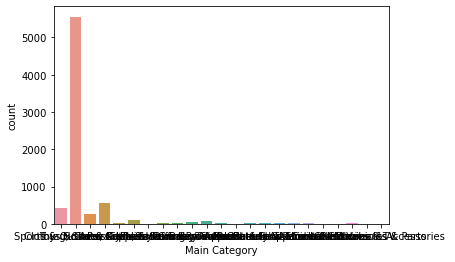

In [254]:
#countplot - histogram-like model used for categorical variables rather than quantitative
sns.countplot(data=dataset, x = 'Main Category')

EDA
#distplot for price of top 5 main categories
#relationship between shipping weight and price 
#most expensive and cheapest product in each category - enable us to get an estimate of the pricing of that product so that suggested products should range between the two
#category with most expensive item and the cheapest item 

Refer to the Kaggle website and start working on the algorithms and codes 

In [255]:
dataset.head()

,Id,Product Name,Selling Price($),About Product,Product Specification,Shipping Weight(Pounds),Main Category,Sub-Category,Side Category
0,101,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",238,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,102,"Electronic Snap Circuits Mini Kits Classpack, ...",100,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4,Toys & Games,Learning & Education,Science Kits & Toys
2,103,3Doodler Create Flexy 3D Printing Filament Ref...,35,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8,Toys & Games,Arts & Crafts,Craft Kits
3,104,Guillow Airplane Design Studio with Travel Cas...,29,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Toys & Games,Hobbies,Models & Model Kits
4,105,Woodstock- Collage 500 pc Puzzle,17,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4,Toys & Games,Puzzles,Jigsaw Puzzles


Recommendation System - Content-Based Filtering

In [256]:
#Import packages

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [257]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)
print(vectorizer.get_feature_names())
print(X.shape)

['about', 'category', 'id', 'main', 'name', 'pounds', 'price', 'product', 'selling', 'shipping', 'side', 'specification', 'sub', 'weight']
(9, 14)


In [217]:
#Revised dataset to conduct the test 
dataset.head()

,Id,Product Name,Selling Price($),About Product,Product Specification,Shipping Weight(Pounds),Main Category,Sub-Category,Side Category
0,101,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",238,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,10.7,Sports & Outdoors,Outdoor Recreation,"Skates, Skateboards & Scooters"
1,102,"Electronic Snap Circuits Mini Kits Classpack, ...",100,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,4,Toys & Games,Learning & Education,Science Kits & Toys
2,103,3Doodler Create Flexy 3D Printing Filament Ref...,35,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,12.8,Toys & Games,Arts & Crafts,Craft Kits
3,104,Guillow Airplane Design Studio with Travel Cas...,29,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,13.4,Toys & Games,Hobbies,Models & Model Kits
4,105,Woodstock- Collage 500 pc Puzzle,17,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,13.4,Toys & Games,Puzzles,Jigsaw Puzzles


In [218]:
dataset["Product Name"].head()

0    DB Longboards CoreFlex Crossbow 41" Bamboo Fib...
1    Electronic Snap Circuits Mini Kits Classpack, ...
2    3Doodler Create Flexy 3D Printing Filament Ref...
3    Guillow Airplane Design Studio with Travel Cas...
4                     Woodstock- Collage 500 pc Puzzle
Name: Product Name, dtype: object

In [230]:
#Creating a TF-IDF Vectorizer
#TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document)
#IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(dataset['About Product'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(7216, 376185)

We can observe that there are 94275 vocabularies in our dataset of 7216 products.

In [232]:
tf.get_feature_names()[4000:4010]

['15 hair toe',
 '15 heads',
 '15 heads sizes',
 '15 height',
 '15 height inches',
 '15 height weighs',
 '15 highly',
 '15 highly engaging',
 '15 inch',
 '15 inch 33cm']

In [220]:
#Calculating Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
results = {}
for idx, row in dataset.iterrows():
   similar_indices = cosine_similarity[idx].argsort()[:-7216:-1] 
   similar_items = [(cosine_similarity[idx][i], dataset['Id'][i]) for i in similar_indices] 
   results[row['Id']] = similar_items[1]

KeyError: 6584